In [54]:
#Importação de bibliotecas para realização do projeto
import scipy.io.matlab as mat
import numpy as np
from scipy.signal import butter, lfilter, freqz, iirnotch, filtfilt
import matplotlib.pyplot as plt
from pyaudio import PyAudio
from scipy.fft import fft, fftfreq, ifft
##comando utilizado para os gráficos serem plotados na mesma página do código
%matplotlib inline  

In [55]:
def toca(tom,fs=8000): 
  x = PyAudio()
  fluxo = x.open(format=x.get_format_from_width(1), channels=1, rate=fs, output=True)
  amostras = ((tom + 1.) * 127.5).astype(int)  # amplit(tom): -1 a +1; amplit(amostras): 0 a 255
  fluxo.write(amostras.tobytes())

In [56]:
x = mat.loadmat('ECGruidoso.mat') #carrega o arquivo do sinal a ser filtrado

In [57]:
s4 = x['s4'][0]

In [58]:
media = np.average(s4)
s4_normalizado = s4 - media

In [59]:
# Definindo os parâmetros do filtro digital.
fs = 3600 # taxa de amostragem
order = 6  # ordem do filtro
fc = 15 # frequência de corte

# Definindo parâmetros utilizados para a filtragem
T = 1         # valor em segundos
n = int(T * fs) # define o total de amostras
t = np.linspace(0, T, n, endpoint=False) # 

Text(0.5, 1.0, 'Sinal Ruidoso Normalizado')

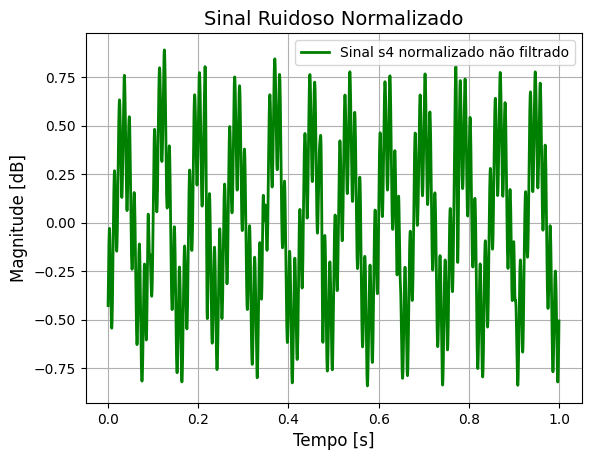

In [60]:
#mostra o sinal normalizado, mas com ruído no tempo
plt.plot(t,s4_normalizado , 'g-', linewidth=2, label='Sinal s4 normalizado não filtrado');
plt.grid(); plt.legend();
plt.xlabel(u'Tempo [s]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Sinal Ruidoso Normalizado', fontsize=14)



In [61]:
toca(s4) #sinal que deve ser filtrado

In [62]:
S4 = fft(s4_normalizado)

In [63]:
N = 3600                     # qtde de amostras
Ts = 1/N    
f = fftfreq(N, Ts)[:N//2] 
escala = 1

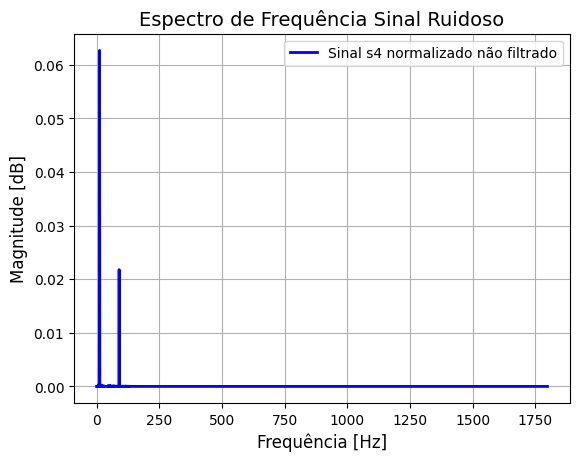

In [64]:
plt.plot(f[:N//(2*escala)], 1.0/N/N * np.abs(S4[0:N//(2*escala)])**2,'b-', linewidth=2, label='Sinal s4 normalizado não filtrado');
plt.grid();
plt.legend();
plt.xlabel(u'Frequência [Hz]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Espectro de Frequência Sinal Ruidoso', fontsize=14)

plt.show()

In [65]:
samp_freq = 3600.0
notch_freq = 90.0
quality_factor = 10

In [66]:
b_notch, a_notch = iirnotch(notch_freq, quality_factor, samp_freq) 
freq, h = freqz(b_notch, a_notch, fs=samp_freq) 

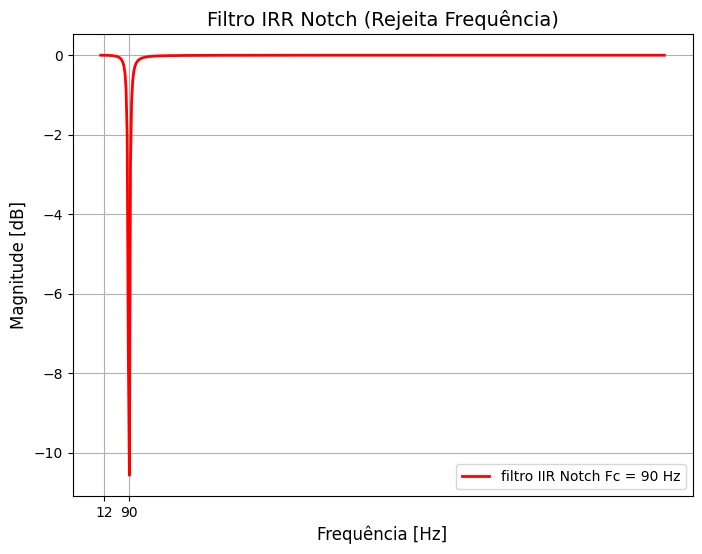

In [67]:
fig = plt.figure(figsize=(8, 6))
plt.plot(freq, 20 * np.log10(abs(h)),'r',linewidth='2', label = 'filtro IIR Notch Fc = 90 Hz')
plt.xlabel(u'Frequência [Hz]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Filtro IRR Notch (Rejeita Frequência)', fontsize=14)
plt.xticks([12,90])
plt.grid(); plt.legend();

In [68]:
outputSignal = filtfilt(b_notch, a_notch, s4_normalizado)

Text(0.5, 1.0, 'Sinal Filtrado Fc = 90 Hz')

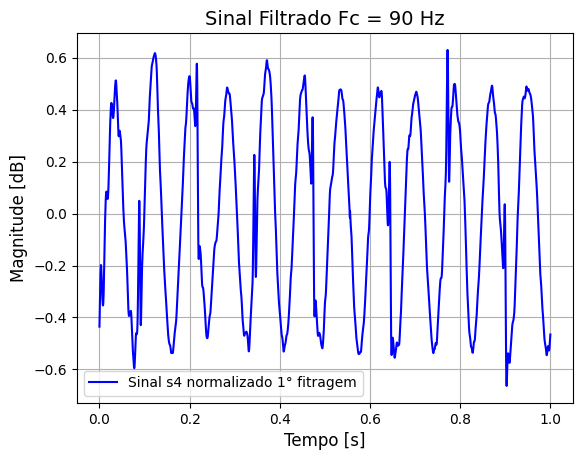

In [69]:
# Saída do sinal do filtro notch com frequência de corte igual a 90 Hz
plt.plot(t, outputSignal, 'b-', label = 'Sinal s4 normalizado 1° fitragem');
plt.grid(); plt.legend();
plt.xlabel(u'Tempo [s]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Sinal Filtrado Fc = 90 Hz', fontsize=14)

In [70]:
fftout = fft(outputSignal)

Text(0.5, 1.0, 'Expectro de Frequência após 1° Filtragem')

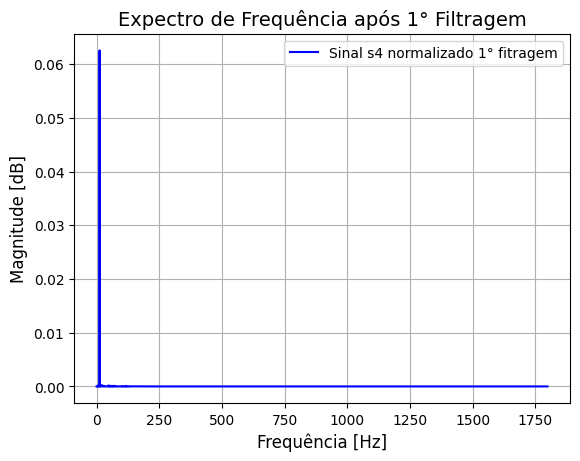

In [71]:
# Visualização do Espectro de Frequência do sinal s4 normalizado e filtrado na fc = 90Hz
plt.plot(f[:N//(2*escala)], 1.0/N/N * np.abs(fftout[0:N//(2*escala)])**2, 'b-', label = 'Sinal s4 normalizado 1° fitragem');
plt.grid(); plt.legend();
plt.xlabel(u'Frequência [Hz]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Expectro de Frequência após 1° Filtragem', fontsize=14)



In [72]:
notch_freq2 = 12.0
quality_factor2 = 3

In [73]:
b_notch2, a_notch2 = iirnotch(notch_freq2, quality_factor2, samp_freq) 
freq, h = freqz(b_notch2, a_notch2, fs=samp_freq) 

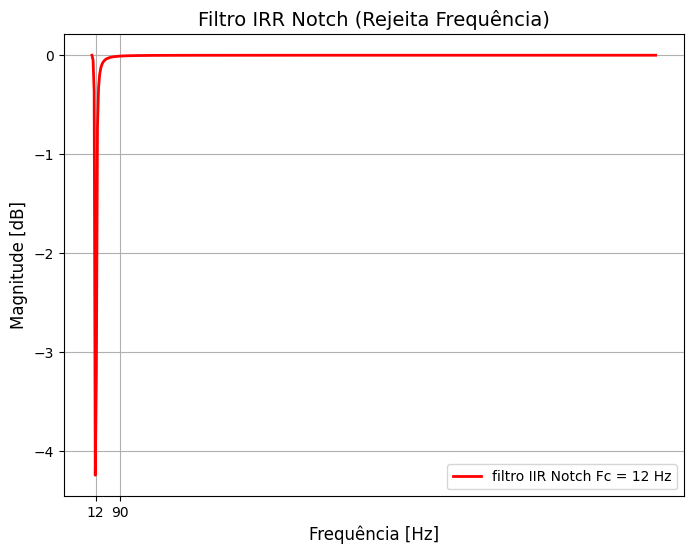

In [74]:
fig = plt.figure(figsize=(8, 6))
plt.plot(freq, 20 * np.log10(abs(h)),'r',linewidth='2', label = 'filtro IIR Notch Fc = 12 Hz')
plt.xlabel(u'Frequência [Hz]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Filtro IRR Notch (Rejeita Frequência)', fontsize=14)
plt.xticks([12,90])
plt.grid(); plt.legend();

In [75]:
outputSignal2 = filtfilt(b_notch2, a_notch2, outputSignal) 

Text(0.5, 1.0, 'Sinal Filtrado [dB] x [s]')

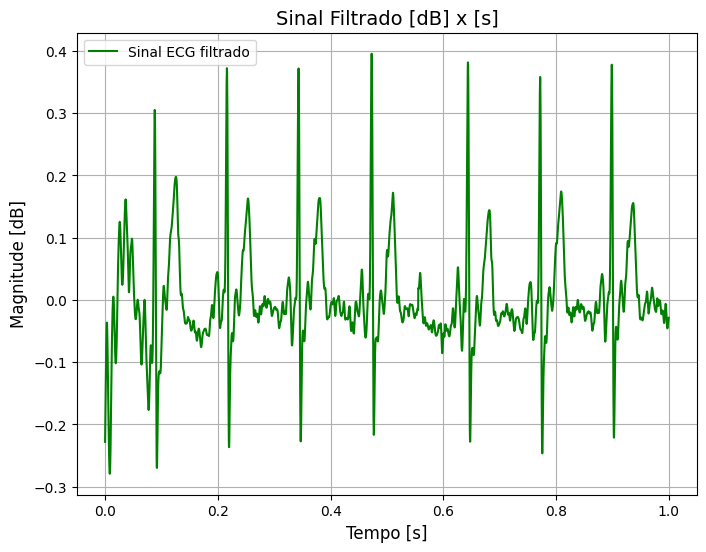

In [76]:
fig = plt.figure(figsize=(8, 6))
plt.plot(t, outputSignal2, 'g', label = 'Sinal ECG filtrado'); # Plota o sinal filtrado no tempo
plt.grid(); plt.legend();
plt.xlabel(u'Tempo [s]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Sinal Filtrado [dB] x [s]', fontsize=14)

Text(0.5, 1.0, 'Sinal Filtrado [dB] x [Hz]')

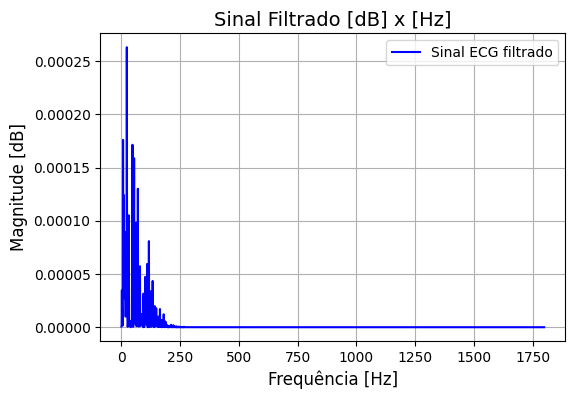

In [77]:
fftout2 = fft(outputSignal2)
fig = plt.figure(figsize=(6,4))
#Plota Espectro de frequência do sinal Filtrado
plt.plot(f[:N//(2*escala)], 1.0/N/N * np.abs(fftout2[0:N//(2*escala)])**2, 'b', label =
'Sinal ECG filtrado');
plt.grid(); plt.legend();
plt.xlabel(u'Frequência [Hz]', fontsize=12)
plt.ylabel(u'Magnitude [dB]', fontsize=12)
plt.title(u'Sinal Filtrado [dB] x [Hz]', fontsize=14)



In [78]:
toca(outputSignal2)